In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Analysis and Results
Laying groundwork to share the methods we used for model selection and parameter tuning.  All accuracy scores will be from cross-validation data.  

##Generating Fake Data
First list all of the parameter variations we were considering.

In [172]:
model_opts=['Majority','LinearSVC', 'LogisticRegression', 'BernoulliNB', 'MultinomialNB', 'LinearRegression']
num_opinion_shards_opts=[100,300,500,1000,1340]
min_required_count_opts=[1000,500,100,50,10]
tfidf_opts=[True,False]
reg_type_opts=['l1','l2']
reg_parameter_opts=[1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4,1e5,1e6,1e7]

Then loop through and generate random f1- and accuracy scores, as well as training and testing times, collecting this all in a data frame.  

In [38]:
df = pd.DataFrame(columns=['model',
                           'num_opinion_shards',
                           'min_required_count',
                           'tfidf','reg_type','reg_parameter',
                          'f1_score',
                          'accuracy','training_time','testing_time'])
for model in model_opts:
    for num_opinion_shards in num_opinion_shards_opts:
        for min_required_count in min_required_count_opts:
            for tfidf in tfidf_opts:
                for reg_type in reg_type_opts:
                    for reg_parameter in reg_parameter_opts:
                        #print model,num_opinion_shards,min_required_count,tfidf,reg_type,reg_parameter
                        #df.append([model,num_opinion_shards,min_required_count,tfidf,reg_type,reg_parameter])
                        mydict=dict(model=model,
                                        num_opinion_shards=num_opinion_shards,
                                        min_required_count=min_required_count,
                                        tfidf=tfidf,
                                        reg_type=reg_type,
                                        reg_parameter=reg_parameter,
                                        f1_score=np.random.random(),
                                        accuracy=np.random.random(),
                                        training_time=round(np.random.random()*1000),
                                        testing_time=round(np.random.random()*1000)
                                    )
                        df = df.append(mydict,ignore_index=True)

In [148]:
df

,model,num_opinion_shards,min_required_count,tfidf,reg_type,reg_parameter,f1_score,accuracy,training_time,testing_time,out-of-box
0,Majority,100,1000,True,l1,0.001,0.981100,0.448760,786,369,1
1,Majority,100,1000,True,l1,0.010,0.062542,0.076990,816,637,0
2,Majority,100,1000,True,l1,0.100,0.219695,0.939001,423,215,0
3,Majority,100,1000,True,l1,1.000,0.827180,0.391860,150,124,0
4,Majority,100,1000,True,l1,10.000,0.197200,0.355882,243,332,0
5,Majority,100,1000,True,l1,100.000,0.543178,0.654244,602,598,0
6,Majority,100,1000,True,l1,1000.000,0.112518,0.870249,745,712,0
7,Majority,100,1000,True,l1,10000.000,0.536229,0.759064,179,643,0
8,Majority,100,1000,True,l1,100000.000,0.954770,0.462250,377,762,0
9,Majority,100,1000,True,l1,1000000.000,0.451800,0.548565,224,652,0


##Out-of-box model performance
Add a column called 'out of box', that indicates which row would represent the out-of-box parameters for the given model

In [73]:
def identify_oob(df_orig):
    df = df_orig
    df['out-of-box']=[0]*df.shape[0]
    for model in model_opts:
        oob_index = min(df.loc[df['model']==model].index)
        df.loc[oob_index,'out-of-box']=1
        
    return df

In [173]:
df.loc[df['out-of-box']==1]

,model,num_opinion_shards,min_required_count,tfidf,reg_type,reg_parameter,f1_score,accuracy,training_time,testing_time,out-of-box
0,Majority,100,1000,True,l1,0.001,0.981100,0.448760,786,369,1
1100,LinearSVC,100,1000,True,l1,0.001,0.050417,0.021786,967,8,1
2200,LogisticRegression,100,1000,True,l1,0.001,0.992079,0.465033,309,454,1
3300,BernoulliNB,100,1000,True,l1,0.001,0.916703,0.314898,323,877,1
4400,MultinomialNB,100,1000,True,l1,0.001,0.249685,0.151931,823,681,1
5500,LinearRegression,100,1000,True,l1,0.001,0.816439,0.694807,182,654,1


Get basic out-of-box accuracy scores for each model

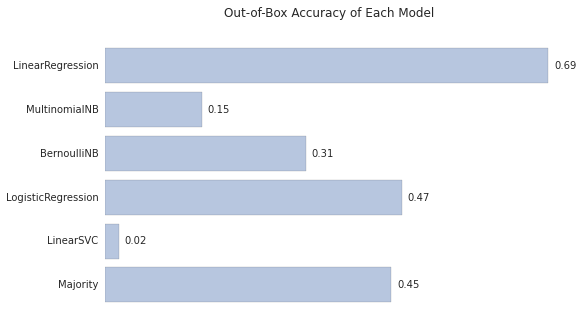

In [143]:
font_size = {
    'paper':8,
    'poster':16,
    'notebook':10,
    'talk':13
}
CONTEXT='notebook'

def oob_model_accuracy_bars(df,context):
    '''
    df: data frame
    context: paper,talk, notebook, poster
    '''
    sns.set_context(context)
    df = identify_oob(df)
    oob_df = df.loc[df['out-of-box']==1]
    
    #size and position of bars
    bar_pos = np.arange(oob_df.shape[0])
    bar_size = oob_df['accuracy'].tolist()
    bar_labels = oob_df['model'].tolist()
    
    #plot
    plt.barh(bar_pos,bar_size, align='center', alpha=0.4)
    plt.yticks(bar_pos, bar_labels)
    plt.xticks([],[]) #no x-axis

    #Add data labels
    for x,y in zip(bar_size,bar_pos):
        plt.text(x+0.01, y, '%.2f' % x, ha='left', va='center',fontsize=font_size[context])
        
    plt.title('Out-of-Box Accuracy of Each Model')
    plt.show()

oob_model_accuracy_bars(df,CONTEXT)

##Identify the best performance of each model
After tuning parameters

In [174]:
def identify_best_of_each_model(df):
    accuracy_list = []
    for model in model_opts:
        best_accuracy = max(df.loc[df['model']==model,'accuracy'])
        accuracy_list.append(best_accuracy)
        
    return model_opts,accuracy_list

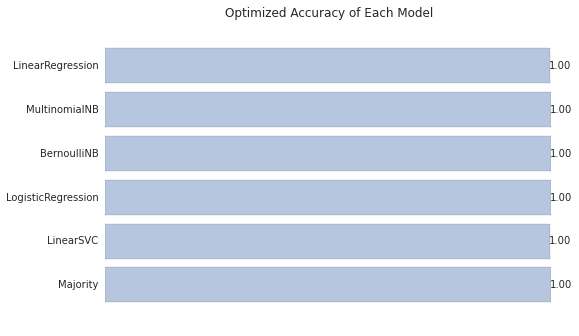

In [147]:
def best_model_accuracy_bars(df,context):
    '''
    df: data frame
    context: paper,talk, notebook, poster
    '''
    
    sns.set_context(context)
    model_list,accuracy_list = identify_best_of_each_model(df)
    
    #size and position of bars
    bar_pos = np.arange(len(model_list))
    bar_size = accuracy_list
    bar_labels = model_list
    
    #plot
    plt.barh(bar_pos,bar_size, align='center', alpha=0.4)
    plt.yticks(bar_pos, bar_labels)
    plt.xticks([],[]) #no x-axis

    #Add data labels
    for x,y in zip(bar_size,bar_pos):
        plt.text(x, y, '%.2f' % x, ha='left', va='center',fontsize=font_size[context])
        
    plt.title('Optimized Accuracy of Each Model')
    plt.show()

best_model_accuracy_bars(df,CONTEXT)

##Parameter Tuning
Show how we arrived at the best model with the best parameters, by demonstrating model accuracy at various parameter levels for various models

In [194]:
def accuracy_by_parameter(parameter,context,xscale):
    grouped = df.groupby(['model',parameter])
    gm = grouped.max()
    sns.set_context(context)
    for model in model_opts:
        x=gm.loc[model,:].index.tolist()
        y=gm.loc[model,'accuracy'].tolist()
        plt.plot(x,y,label=model)
        
    plt.xscale(xscale)
    plt.title('Model Accuracy, varying %s' %parameter)
    plt.legend()

XSCALE='linear'

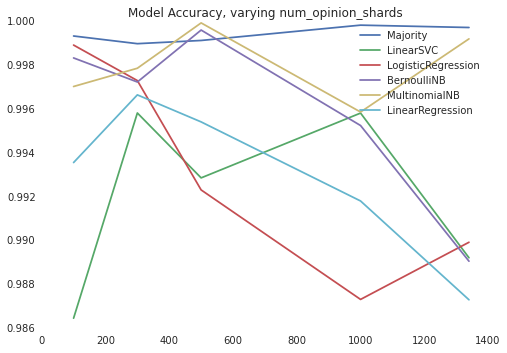

In [195]:
accuracy_by_parameter('num_opinion_shards',CONTEXT,XSCALE)

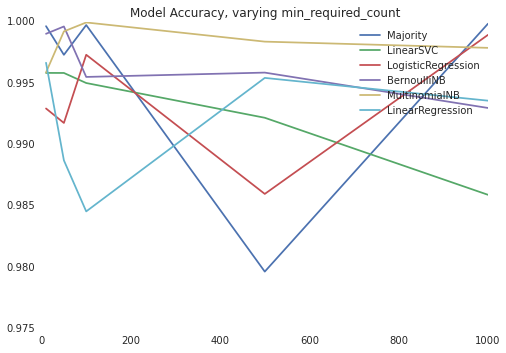

In [197]:
accuracy_by_parameter('min_required_count',CONTEXT,XSCALE)

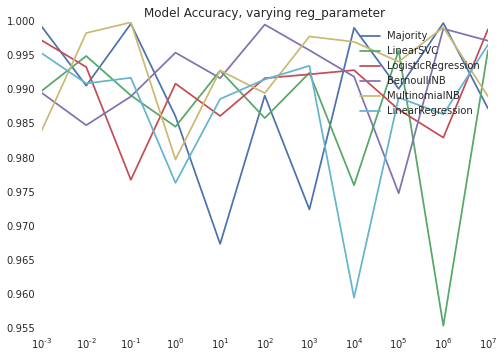

In [198]:
accuracy_by_parameter('reg_parameter',CONTEXT,'log')

#TODO:
ROC curves for liberal, conservative vs. mixed
Performance for just liberal vs conservative, with mixed removed
Grouped Bar chart, displaying TFIDF vs count

##RESULTS
test accuracy of best model on test data
Display list of most influential/predictive/common words, either as a sorted bar chart or word cloud
Get examples of words in context for spot-checking.  Map back to actual essays.  

##Results